## Challenge Exercise 2 (CE2)

### Due on 9/8/25 @ 11:55 pm EST (see Canvas Assignment)

****

## Collaboration policy

This is a group assignment. The maximum number of students per group is four. There are no existing group assignments. However, **all group members must be different from those in CE1** (i.e., there is no overlap with a previous group).

Please be welcoming and kind, and invite students you may not know well (i.e., be a good classmate). If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.

### Team members

1. Yuyang Deng

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. dyy12, 730660498

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

## Numerical approximations.

The data points in matrix $A$ form a 2D cosine curve (shown below). Specifically, $A$ is a $500x2$ matrix where each row $i$ represents a point $P_i(x_i, y_i)$ in a Cartesian coordinate system. This data will be used to estimate the inflection points, convex points, and tangents numerically.

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The Mathematics overview slides (see Canvas schedule) may be helpful.


In [73]:
A = np.loadtxt("A.csv", delimiter=",")
[m,n]=A.shape
print( "A is {} x {} dimension matrix".format( m, n ) )

A is 500 x 2 dimension matrix


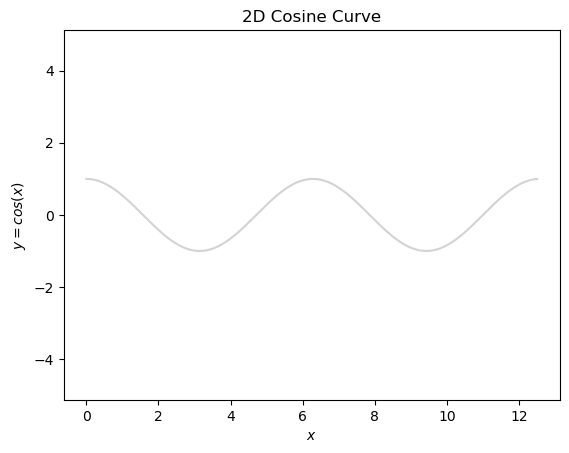

In [74]:
plt.plot( A[:,0], A[:,1], "lightgrey")
plt.title("2D Cosine Curve")
plt.xlabel(r'$x$')
plt.ylabel(r'$y=cos(x)$')
plt.axis("equal")
plt.show()

<img src="p1.png" width="450" style="float: right"/>

**P1** (5 Points). In the coding cell below, write a small program that numerically estimates the inflection points. To receive full credit, your solution must create a plot that is identical to the one provided. <ins>Note</ins>: You may assume a derivative less than $0.0015$ is approximately zero.

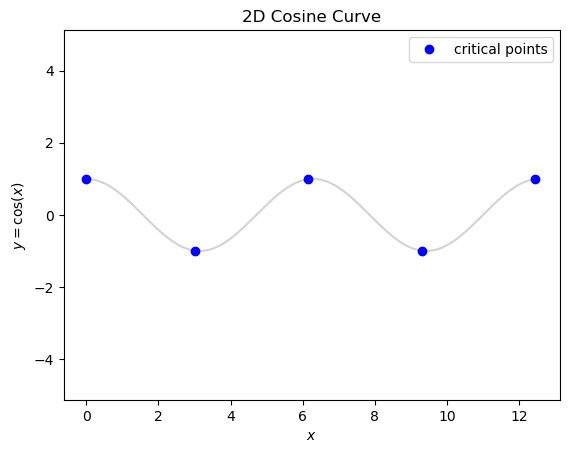

In [75]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

x, y = A[:,0], A[:,1]

d = np.gradient(y, x)
d_0 = 0.15
idx = np.where(np.abs(d) < d_0)[0]

if idx.size:                              
    idx = idx[np.r_[True, np.diff(idx) > 1]]
else:                                    
    idx = np.where((d[:-1] > 0) & (d[1:] < 0))[0] + 1

plt.plot(x, y, "lightgrey")
plt.plot(x[idx], y[idx], "o", label="critical points", color="blue")
plt.title("2D Cosine Curve")
plt.xlabel(r"$x$")
plt.ylabel(r"$y=\cos(x)$")
plt.axis("equal")
plt.legend()
plt.show()

<img src="p2.png" width="450" style="float: right"/>

**P2** (5 Points). In the coding cell below, write a small program that numerically estimates the convex points. To receive full credit, your solution must create a plot that is identical to the one provided. You may assume a derivative less than $0.0015$ is approximately zero.

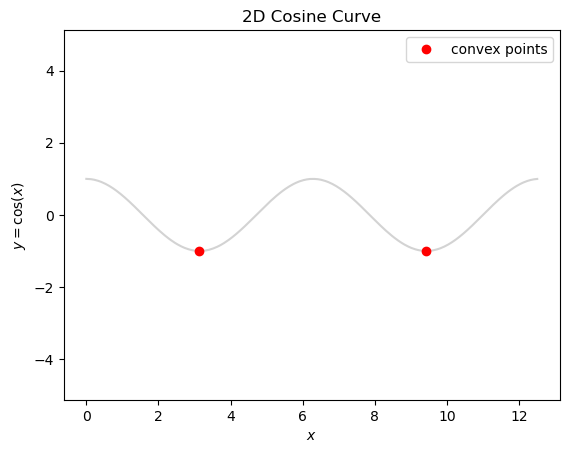

In [76]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

x, y = A[:,0], A[:,1]

d = np.gradient(y, x)
k = np.where((d[:-1] < 0) & (d[1:] > 0))[0] + 1  

plt.plot(x, y, "lightgrey")
plt.plot(x[k], y[k], "o", label="convex points", color="red")
plt.title("2D Cosine Curve")
plt.xlabel(r"$x$")
plt.ylabel(r"$y=\cos(x)$")
plt.axis("equal")
plt.legend()
plt.show()


<img src="p3.png" width="450" style="float: right"/>

**P3** (5 Points). In the coding cell below, write a small program that numerically estimates the **unit** tangent vectors (using the L2 norm) only for the **blue** points. To receive full credit, your solution must create a plot identical to the one provided. <ins>Note</ins>: The color of the tangent line is magenta.

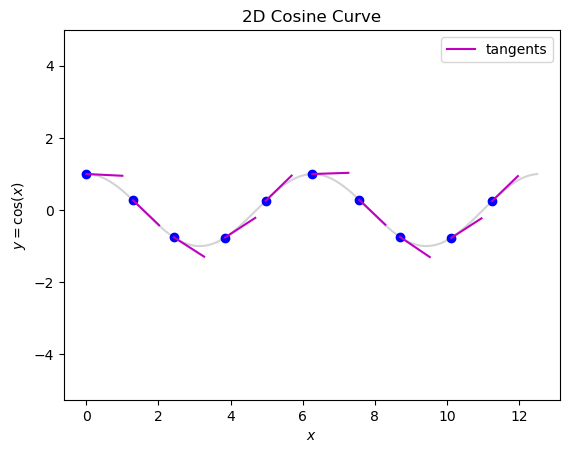

In [77]:
# --------------------------------------
# This code is provided to you.
# Do not modify it.
# --------------------------------------
delta=50
plt.plot( A[:,0], A[:,1], "lightgrey" )
plt.plot( A[::delta, 0], A[::delta,1], "bo" )
plt.axis("equal")

# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

x, y = A[:,0], A[:,1]
dy = np.gradient(y, x)
idx = np.arange(0, len(x), delta)

L = 1.0
for j, i in enumerate(idx):
    t0, t1 = 1.0, float(dy[i])           
    n = (t0*t0 + t1*t1)**0.5             
    t0, t1 = t0/n, t1/n                  
    p0, p1 = x[i], y[i]
    q0, q1 = p0 + L*t0, p1 + L*t1        
    plt.plot([p0, q0], [p1, q1], "m-", label="tangents" if j == 0 else None)

plt.title("2D Cosine Curve")
plt.xlabel(r"$x$")
plt.ylabel(r"$y=\cos(x)$")
plt.legend()
plt.show()


****

## Data standardization.

The dataframe (**df**) shown below defines two features (or columns) labeled **f1** and **f2**, each with $1,000$ samples. Also shown are the histogram plots for each feature.

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The data manipulation notebook (see Canvas schedule, 8/21) may be helpful.
- The Mathematics overview slides (see Canvas schedule) may be helpful.
- The Data representation and processing slides (see Canvas schedule) may be helpful.

In [78]:
df = pd.read_csv("G.csv")
df

,f1,f2
0,-2.110000,0.130529
1,1.005415,2.480679
2,1.410057,3.321763
3,6.259839,2.880217
4,5.100076,1.930848
...,...,...
995,2.380652,0.767333
996,-0.757000,1.108744
997,1.668813,2.938973
998,2.400584,1.796796


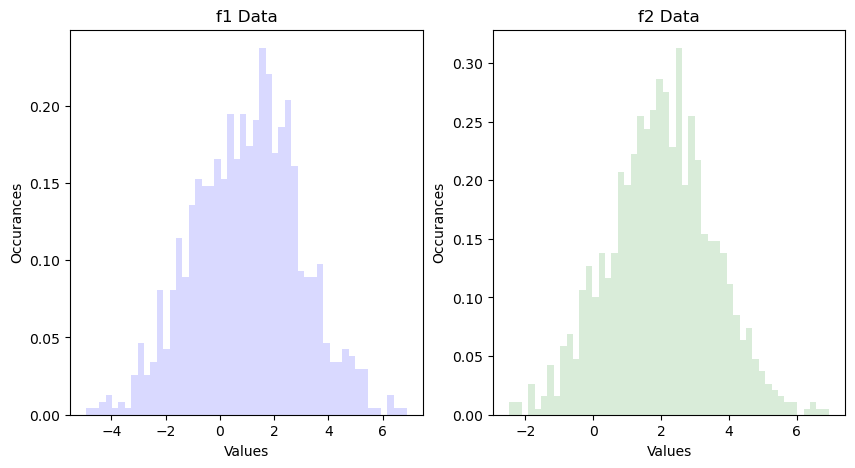

In [79]:
plt.figure( figsize=(10,5) )
plt.subplot(121)
plt.hist( "f1", bins=50, density=True, facecolor="blue", alpha=0.15, data=df )
plt.xlabel( "Values")
plt.ylabel( "Occurances" )
plt.title("f1 Data")
plt.subplot(122)
plt.hist( "f2", bins=50, density=True, facecolor="green", alpha=0.15, data=df )
plt.xlabel( "Values")
plt.ylabel( "Occurances" )
plt.title("f2 Data")
plt.show()

<img src="p4.png" width="450" style="float: right"/>

**P4** (5 Points). In the coding cell below, write a small program that:
- Fit the **f1** values to a normal distribution and overlay them on the histogram plot.
- Standardize the **f1** values using the z-score and display them in a histogram plot.
- Fit the z-score **f1** values to a normal distribution and overlay them on the z-score histogram plot.

To receive full credit, your solution must create a plot identical to the one provided. 

<ins>Note(s)</ins>: 
- The number of histogram bins is $50$.
- The line color for the non-standardized distribution is **blue**.
- The line color for the standardized distribution is **red**.
- The x-axis for both distributions begin at $-10$ and end at $10$ (inclusive).

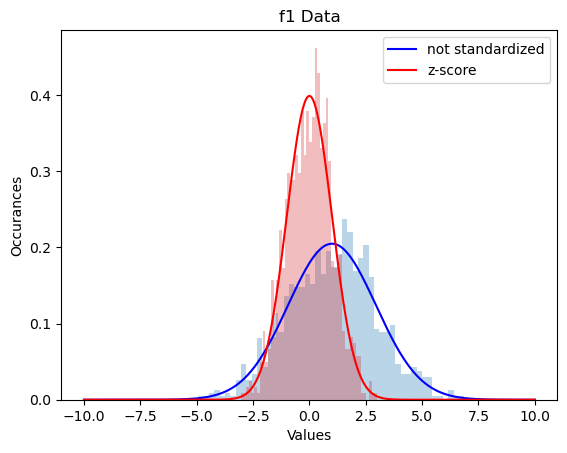

In [89]:
# --------------------------------------
# This code is provided to you.
# Do not modify it.
# --------------------------------------

x = np.linspace(-10,10,1000)

# --------------------------------------
# Add your P4 coding solution below.
# --------------------------------------

f1 = df["f1"]

mu  = np.mean(f1)
sig = np.std(f1)                     

z = (f1 - mu) / sig                  

plt.hist(f1, bins=50, density=True, alpha=0.3, color="tab:blue")
plt.hist(z,  bins=50, density=True, alpha=0.3, color="tab:red")

pdf_f1 = (1/(sig*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sig)**2)
pdf_z  = (1/np.sqrt(2*np.pi))       * np.exp(-0.5*(x**2))

plt.plot(x, pdf_f1, "b-", label="not standardized")
plt.plot(x, pdf_z,  "r-", label="z-score")

plt.title("f1 Data")
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.xlim(-11, 11)
plt.legend()
plt.show()


<img src="p5.png" width="450" style="float: right"/>

**P5** (5 Points). In the coding cell below, write a small program that:
- Fit the **f2** values to a normal distribution and overlay them on the histogram plot.
- Standardize the **f2** values using the z-score and display them in a histogram plot.
- Fit the z-score **f2** values to a normal distribution and overlay them on the z-score histogram plot.

To receive full credit, your solution must create a plot identical to the one provided. 

<ins>Note(s)</ins>: 
- The number of histogram bins is $50$.
- The line color for the non-standardized distribution is **blue**.
- The line color for the standardized distribution is **red**.
- The x-axis for both distributions begin at $-10$ and end at $10$ (inclusive).
    

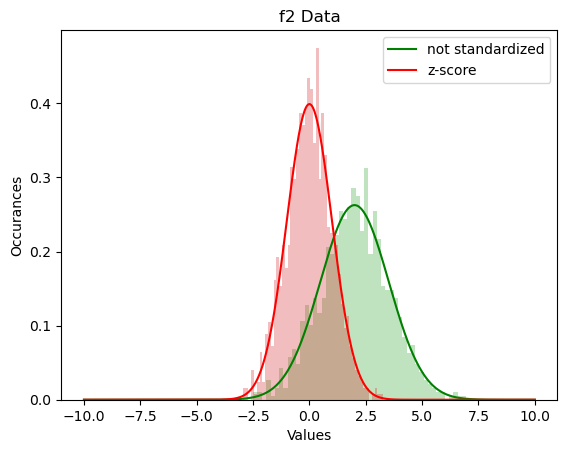

In [90]:
# --------------------------------------
# This code is provided to you.
# Do not modify it.
# --------------------------------------

x = np.linspace(-10,10,1000)

# --------------------------------------
# Add your P5 coding solution below.
# --------------------------------------

# assumes: x = np.linspace(-10,10,1000) is given and f2 is a 1-D numpy array

f2 = df["f2"]

mu2  = np.mean(f2)
sd2  = np.std(f2)

z2   = (f2 - mu2) / sd2

plt.hist(f2, bins=50, density=True, alpha=0.3, color="tab:green")
plt.hist(z2, bins=50, density=True, alpha=0.3, color="tab:red")

pdf2  = (1/(sd2*np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu2)/sd2)**2)
pdfz2 = (1/np.sqrt(2*np.pi))       * np.exp(-0.5*(x**2))

plt.plot(x, pdf2,  "g-", label="not standardized")
plt.plot(x, pdfz2, "r-", label="z-score")

plt.title("f2 Data")
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.xlim(-11, 11)
plt.legend()
plt.show()